# Proyecto final

# <font color='red'> KEVIN BALANTA, A00042972 </font>
# <font color='red'> JAIVER OROZCO, A00045508 </font>

## Parte 1

#  Carga y baselines pre-limpieza de datos

In [2]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
from pandas.plotting import scatter_matrix


import math
from collections import Counter
import matplotlib.pyplot as plt #gráficos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression # modelos lineales
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score,cross_validate #protocolo de evaluación
from sklearn import datasets, metrics, neighbors, tree
from sklearn import naive_bayes
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
import scipy.cluster.hierarchy as shc

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("PF-02-DatosTelco.csv", delimiter = ",")

### Exploración de los datos

In [20]:
data.head()

ESTADO  INGRESOS          CASA  PRECIO_DISPOSITIVO  MESES  DURACION  \
0  VINCULADO   4074840  8.830000e+08           1444153.0     26       2.3   
1  VINCULADO   8574088  1.745000e+09           2157661.0     23       3.7   
2   RETIRADO    795993  9.500000e+07            452809.0     38      16.8   
3   RETIRADO   8115015  8.300000e+07           2617184.0     37      17.6   
4   RETIRADO   8187499  6.770000e+08            666069.0     19       0.0   

   SOBRECARGO  SALDO_RESTANTE  SATISFACCION  
0   11.167542            20.3      1.762872  
1    0.000000            53.5      3.361266  
2  350.610224            13.9      8.359438  
3  230.913888            45.7      8.964017  
4  131.541983            67.2      8.808206

In [21]:
data.tail()

ESTADO  INGRESOS         CASA  PRECIO_DISPOSITIVO  MESES  DURACION  \
23157   RETIRADO    473169   99000000.0           1128088.0     28      14.9   
23158  VINCULADO   3544204  773000000.0            332460.0      0       2.0   
23159   RETIRADO   7523054  446000000.0            296138.0      6      17.8   
23160  VINCULADO   1205914  261000000.0           2206199.0     44      16.1   
23161  VINCULADO   8343704  528000000.0           2022312.0      0      16.8   

       SOBRECARGO  SALDO_RESTANTE  SATISFACCION  
23157   153.90060            18.6      8.359296  
23158    20.31440            16.4      2.670153  
23159   290.73090            58.9      8.510907  
23160   139.29630            18.2      8.773616  
23161    21.57594            64.9      2.332979

In [22]:
data.shape

(23162, 9)

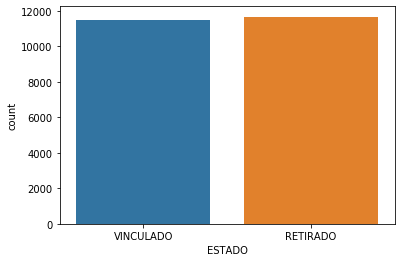

In [7]:
ax=sns.countplot(x="ESTADO", data=data)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 9 columns):
ESTADO                23162 non-null object
INGRESOS              23162 non-null int64
CASA                  23162 non-null float64
PRECIO_DISPOSITIVO    23162 non-null float64
MESES                 23162 non-null int64
DURACION              23162 non-null float64
SOBRECARGO            23162 non-null float64
SALDO_RESTANTE        23162 non-null float64
SATISFACCION          23162 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.6+ MB


## Análisis de anomalias en los datos

In [66]:
data.describe(include="all").T

count unique       top   freq         mean          std  \
ESTADO              23162      2  RETIRADO  11665          NaN          NaN   
INGRESOS            23162    NaN       NaN    NaN  4.81312e+06  2.73737e+06   
CASA                23162    NaN       NaN    NaN  7.16144e+08  4.81155e+08   
PRECIO_DISPOSITIVO  23162    NaN       NaN    NaN  1.31534e+06       748570   
MESES               23162    NaN       NaN    NaN      24.1971       14.264   
DURACION            23162    NaN       NaN    NaN      9.60985      7.04001   
SOBRECARGO          23162    NaN       NaN    NaN      110.056      100.772   
SALDO_RESTANTE      23162    NaN       NaN    NaN      42.9919      30.2045   
SATISFACCION        23162    NaN       NaN    NaN      5.48084      2.80994   

                        min         25%          50%          75%       max  
ESTADO                  NaN         NaN          NaN          NaN       NaN  
INGRESOS             150000  2.1563e+06  6.13755e+06  7.34718e+06  9.65e+06  
CASA                  8e+07    3.57e+08     6.24e+08   9.0775e+08  2.18e+09  
PRECIO_DISPOSITIVO   200000      657184  1.23746e+06  1.82958e+06   4.7e+06  
MESES                     0          14           24           34        79  
DURACION                  0         2.1         14.6         16.1      20.1  
SOBRECARGO                0     12.5669      75.3836       201.55   411.168  
SALDO_RESTANTE            0        15.2        37.65           70     130.7  
SATISFACCION        0.61358      2.7055      4.06455      8.26824   9.64262

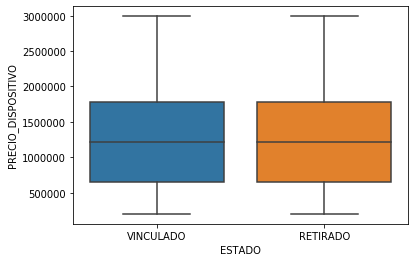

In [153]:
sns.boxplot(data=data,x="ESTADO", y="PRECIO_DISPOSITIVO")

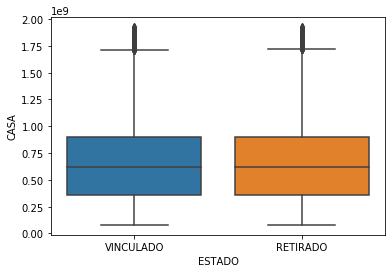

In [154]:
sns.boxplot(data=data,x="ESTADO", y="CASA")

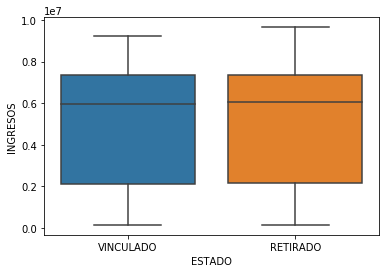

In [155]:
sns.boxplot(data=data,x="ESTADO", y="INGRESOS")

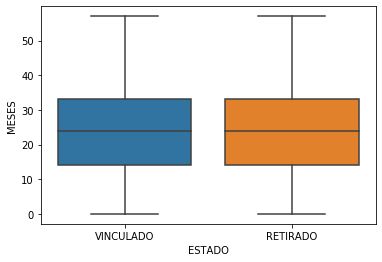

In [156]:
sns.boxplot(data=data,x="ESTADO", y="MESES")

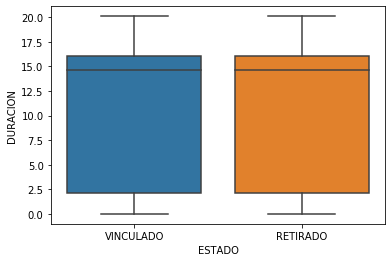

In [157]:
sns.boxplot(data=data,x="ESTADO", y="DURACION")

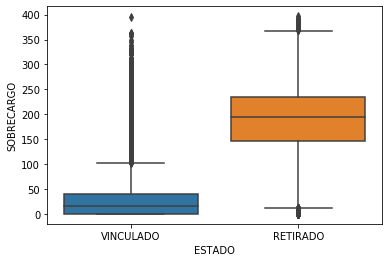

In [158]:
sns.boxplot(data=data,x="ESTADO", y="SOBRECARGO")

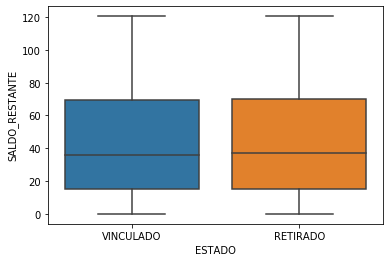

In [159]:
sns.boxplot(data=data,x="ESTADO", y="SALDO_RESTANTE")

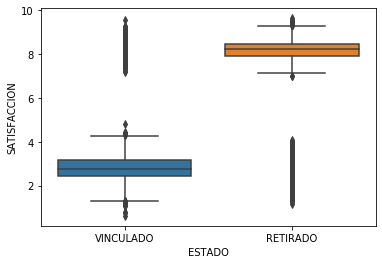

In [160]:
sns.boxplot(data=data,x="ESTADO", y="SATISFACCION")

Al observar y analizar la información anterior, se puede evidenciar que es posible que se presenten valores atipicos en las variables:

- Casa
- Precio_dispositivo
- Meses
- Sobrecargo
- Satiscaccion



### Limpieza de datos

Se eliminan aquellos datos que se encuentren por fuera de 4 veces la desv. est.

In [5]:

values=data.columns.values.tolist()[1:]
for value in values:
    mean=np.mean(data[value])
    deviation=data[value].std()
    #The deviation is calculated by 4
    deviationx4=deviation*4
    #Calculate the limits// SUMANDOLE A LA MEDIA?
    upperLimit=mean+deviationx4
    lowerLimit=mean-deviationx4
    #Aqui podriamos borrarlos
    indexes = data.loc[data[value]>upperLimit].index
    data.drop(indexes , inplace=True)
    
    indexes2 = data.loc[data[value]<lowerLimit].index
    data.drop(indexes2 , inplace=True)


## Analisis de correlación

In [9]:
corr = data.corr()

In [10]:
corr

INGRESOS      CASA  PRECIO_DISPOSITIVO     MESES  \
INGRESOS            1.000000  0.384465           -0.006736 -0.005715   
CASA                0.384465  1.000000            0.001439 -0.002846   
PRECIO_DISPOSITIVO -0.006736  0.001439            1.000000 -0.001461   
MESES              -0.005715 -0.002846           -0.001461  1.000000   
DURACION           -0.158182 -0.063700            0.011556  0.007094   
SOBRECARGO         -0.000666  0.003249            0.005013  0.004717   
SALDO_RESTANTE      0.844883  0.326608           -0.004230 -0.003614   
SATISFACCION        0.002619  0.002450           -0.000413  0.002726   

                    DURACION  SOBRECARGO  SALDO_RESTANTE  SATISFACCION  
INGRESOS           -0.158182   -0.000666        0.844883      0.002619  
CASA               -0.063700    0.003249        0.326608      0.002450  
PRECIO_DISPOSITIVO  0.011556    0.005013       -0.004230     -0.000413  
MESES               0.007094    0.004717       -0.003614      0.002726  
DURACION            1.000000    0.001898        0.046901      0.000928  
SOBRECARGO          0.001898    1.000000        0.002447      0.889806  
SALDO_RESTANTE      0.046901    0.002447        1.000000      0.004330  
SATISFACCION        0.000928    0.889806        0.004330      1.000000

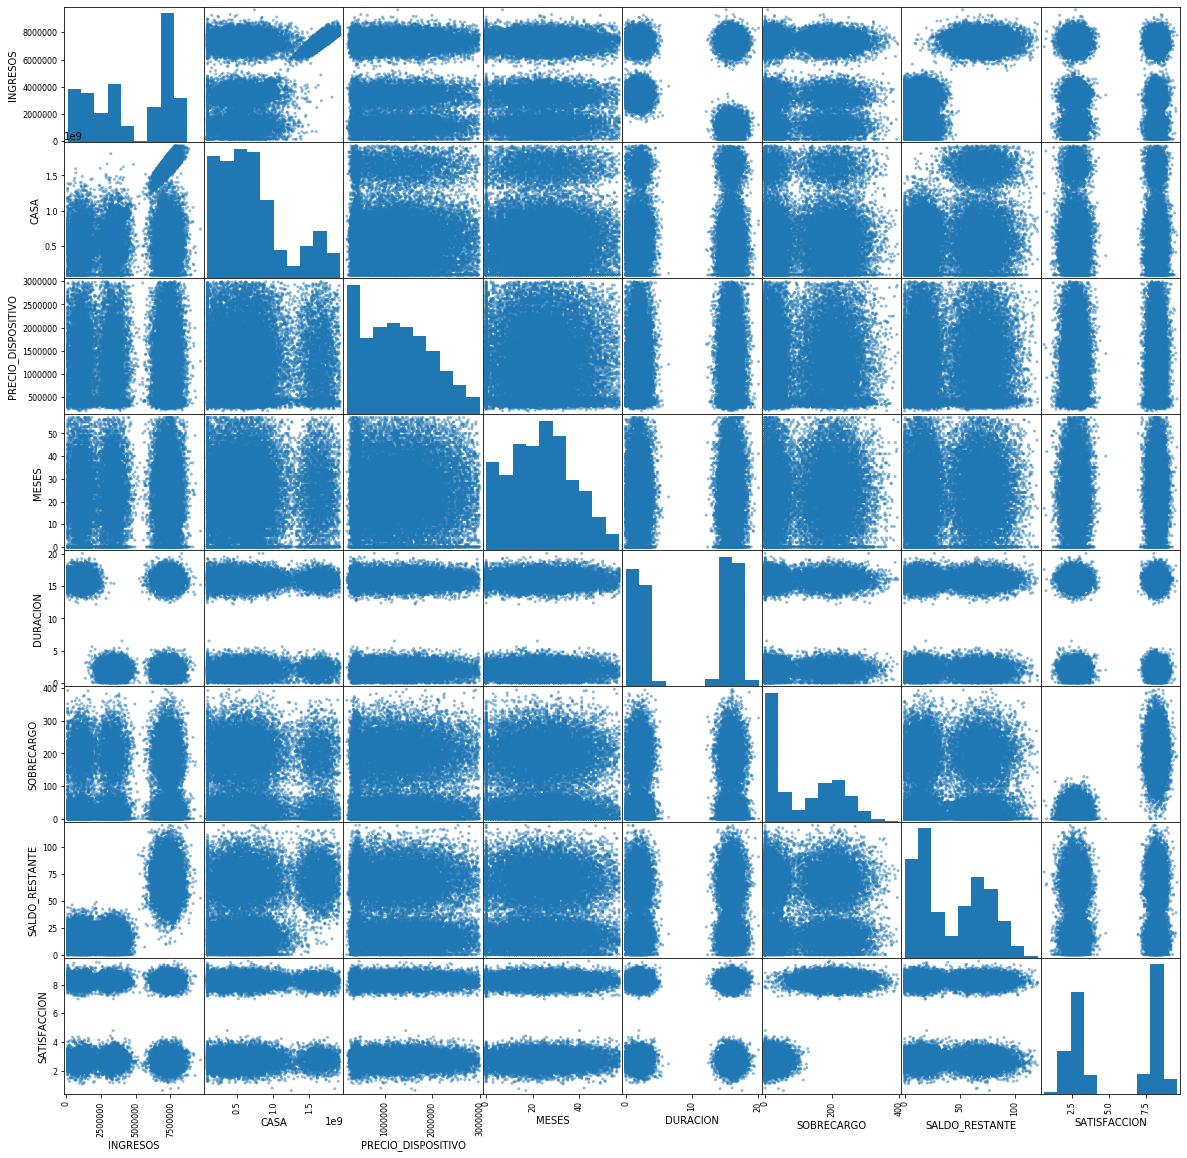

In [173]:
scatter_matrix(data, figsize=(20, 20))
plt.show()

Despues de analizar la correlación de las variables, lo que podemos explicar de la implicación de este aspecto en los PCA es que cuando se tienen demasiadas dimensiones es posible que haya la forma de explotar la correlación que existen entre ellas (redundancia) y explicar varias dimensiones como la combinación de otras. Entonces la reducción de la dimensionalidad explota la estructura y correlación y nos permite trabajar con una representación más compacta de los datos, idealmente sin pérdida de información. De esta manera, al tener una mayor correlación de los datos se disminuye la cantidad de dimensiones lo que nos permite tener un mayor entendimiento y comprención de los datos.


# BASELINE

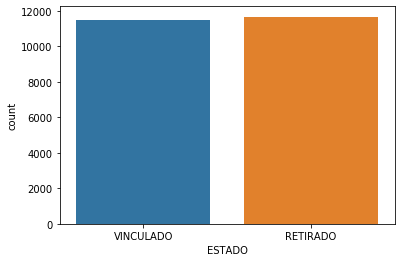

In [12]:
ax=sns.countplot(x="ESTADO", data=data)

In [14]:
pd.crosstab(index=data["ESTADO"], columns="count")

col_0      count
ESTADO          
RETIRADO   11664
VINCULADO  11494

In [15]:
data.ESTADO[data.ESTADO=="RETIRADO"].aggregate('count') / data.shape[0] * 100

50.367043786164615

In [13]:

total=data.ESTADO.count()
vinculado=data.loc[data.ESTADO=="VINCULADO",]
numero=vinculado.ESTADO.aggregate('count')

print("El numero de personas que se vinculado:{0}".format(numero))
print("El porcentaje de personas que se vincularon:{0:.2f}%".format((numero*100)/total))



El numero de personas que se vinculado:11494
El porcentaje de personas que se vincularon:49.63%


In [14]:

total=data.ESTADO.count()
retirado=data.loc[data.ESTADO=="RETIRADO",]
numero=retirado.ESTADO.aggregate('count')

print("El numero de personas que se retiraron:{0}".format(numero))
print("El porcentaje de personas que retiraron:{0:.2f}%".format((numero*100)/total))



El numero de personas que se retiraron:11664
El porcentaje de personas que retiraron:50.37%


Por lo que se puede observar, la mayoria de los registros aparecen en retirados. Por lo tanto, en este caso el baseline se toma como el valor de la clase mayoritaria el cual es "Retirado"

In [6]:
X = data.loc[:,['INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION', 'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION']]

y = data.loc[:,['ESTADO']]

In [7]:
X.head()

INGRESOS          CASA  PRECIO_DISPOSITIVO  MESES  DURACION  SOBRECARGO  \
0   4074840  8.830000e+08           1444153.0     26       2.3   11.167542   
1   8574088  1.745000e+09           2157661.0     23       3.7    0.000000   
2    795993  9.500000e+07            452809.0     38      16.8  350.610224   
3   8115015  8.300000e+07           2617184.0     37      17.6  230.913888   
4   8187499  6.770000e+08            666069.0     19       0.0  131.541983   

   SALDO_RESTANTE  SATISFACCION  
0            20.3      1.762872  
1            53.5      3.361266  
2            13.9      8.359438  
3            45.7      8.964017  
4            67.2      8.808206

In [8]:
y.head()

ESTADO
0  VINCULADO
1  VINCULADO
2   RETIRADO
3   RETIRADO
4   RETIRADO

## HoldOut

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345, stratify=y)

In [10]:
# Crear un normalizador Min-Max
min_max_scaler = preprocessing.MinMaxScaler()

# Aprender sus parámetros con el set de entrenamiento y transformar los dos datasets
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [11]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

### Ahora se buscara los mejores parametros para entrenar los modelos

In [30]:
#KNN
acc_train_vec=[]
acc_test_vec=[]
kappa_train_vec=[]
kappa_test_vec=[]
k_vec= np.arange(1,50)
for k in k_vec:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
   

    y_pred = knn.predict(X_train_scaled)
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    kappa_train_vec.append(metrics.cohen_kappa_score(y_train, y_pred))
    
    
    y_pred = knn.predict(X_test_scaled)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
    kappa_test_vec.append(metrics.cohen_kappa_score(y_test, y_pred))

In [31]:
k_optimo = k_vec[np.argmax(acc_test_vec)]
acc_optima= max(acc_test_vec)
print("El óptimo se obtiene con K=%d, que produce un %.2f%% de exactitud" %(k_optimo, 100*acc_optima))

k_optimo = k_vec[np.argmax(kappa_test_vec)]
kappa_optima= max(kappa_test_vec)
print("El óptimo se obtiene con K=%d, que produce un %.2f%% de kappa" %(k_optimo, 100*kappa_optima))

El óptimo se obtiene con K=11, que produce un 90.43% de exactitud
El óptimo se obtiene con K=11, que produce un 80.86% de kappa


In [44]:
#NAIVE_BAYES
gnb_acc=[]
acc_test_vec=[]
alpha_vec= [100, 50, 10, 5, 1, 0.5, 0.4, 0.3, 0.2, 0.1, 0.09, 0.08, 0.07, 0.05, 0.01, 0.005, 0.001,1e-9]
for alpha in alpha_vec:
    gnb = naive_bayes.GaussianNB(var_smoothing=alpha)
    gaussianaive = gnb.fit(X_train_scaled , y_train)
    
    acc = cross_val_score(gnb, X_train , y_train, cv=5, scoring='accuracy')
    gnb_acc.append(acc.mean())
    #print("Coeficiente de Laplace en train=",alpha, ", exactitud de =",acc.mean())
    
    y_pred = gaussianaive.predict(X_test_scaled)
    acc_test_vec.append( metrics.accuracy_score(y_test, y_pred))
print(acc_test_vec)

Coeficiente de Laplace en train= 100 , exactitud de = 0.5036397285626157
Coeficiente de Laplace en train= 50 , exactitud de = 0.5036397285626157
Coeficiente de Laplace en train= 10 , exactitud de = 0.5036397285626157
Coeficiente de Laplace en train= 5 , exactitud de = 0.5036397285626157
Coeficiente de Laplace en train= 1 , exactitud de = 0.5036397285626157
Coeficiente de Laplace en train= 0.5 , exactitud de = 0.5035163479333745
Coeficiente de Laplace en train= 0.4 , exactitud de = 0.503454657618754
Coeficiente de Laplace en train= 0.3 , exactitud de = 0.5030845157310303
Coeficiente de Laplace en train= 0.2 , exactitud de = 0.5032078963602715
Coeficiente de Laplace en train= 0.1 , exactitud de = 0.5032078963602715
Coeficiente de Laplace en train= 0.09 , exactitud de = 0.5033312769895126
Coeficiente de Laplace en train= 0.08 , exactitud de = 0.5032078963602715
Coeficiente de Laplace en train= 0.07 , exactitud de = 0.5032078963602715
Coeficiente de Laplace en train= 0.05 , exactitud de = 

In [45]:
alpha_optimo = alpha_vec[np.argmax(acc_test_vec)]
acc_optima= max(acc_test_vec)
print("El óptimo se obtiene con alpha=%f, que produce un %.3f%% de exactitud" %(alpha_optimo, 100*acc_optima))

El óptimo se obtiene con alpha=50.000000, que produce un 90.429% de exactitud


In [30]:
# Arbol de decisión
np.random.seed(1234)
ctree = tree.DecisionTreeClassifier(
    criterion='entropy', # el criterio de particionamiento de un conjunto de datos (gini, entropy)
    max_depth=None,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
    min_samples_split=2, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
    min_samples_leaf=1,  # prepoda: el mínimo número de registros en una hoja
    random_state=None,   # semilla del generador aleatorio utilizado para 
    max_leaf_nodes=2, # prepoda: máximo número de nodos hojas
    min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
    class_weight=None    # permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
)
#1

### Evaluación de los modelos

In [31]:

#Knn
knn = neighbors.KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
knn_exactitudes = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')

#Naive
gnb = naive_bayes.GaussianNB(var_smoothing=50)
gnb.fit(X_train_scaled, y_train)
gnb_exactitudes = cross_val_score(gnb, X_train_scaled , y_train, cv=5, scoring='accuracy')

# Arbol de decisión
ctree.fit(X_train_scaled, y_train)
tree_exactitudes = cross_val_score(ctree, X_train_scaled , y_train, cv=5, scoring='accuracy')

#print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))

In [32]:
print("KNN. Exactitudes: %0.2f (+/- %0.2f)" % (knn_exactitudes.mean(), knn_exactitudes.std() * 2))
print("GNB. Exactitudes: %0.2f (+/- %0.2f)" % (gnb_exactitudes.mean(), gnb_exactitudes.std() * 2))
print("TREE. Exactitudes: %0.2f (+/- %0.2f)" % (tree_exactitudes.mean(), tree_exactitudes.std() * 2))

y_predict_knn = knn.predict(X_test_scaled)
y_predict_gnb = gnb.predict(X_test_scaled)
y_predict_tree = ctree.predict(X_test_scaled)


print("Kappa knn: ", metrics.cohen_kappa_score(y_test, y_predict_knn))
print("Kappa gnb: ", metrics.cohen_kappa_score(y_test, y_predict_gnb))
print("Kappa tree: ", metrics.cohen_kappa_score(y_test, y_predict_tree))




KNN. Exactitudes: 0.91 (+/- 0.00)
GNB. Exactitudes: 0.91 (+/- 0.00)
TREE. Exactitudes: 0.91 (+/- 0.00)
Kappa knn:  0.8085792452145433
Kappa gnb:  0.8085792452145433
Kappa tree:  0.8085792452145433


--------------------------------------------KNN-------------------------------------------------


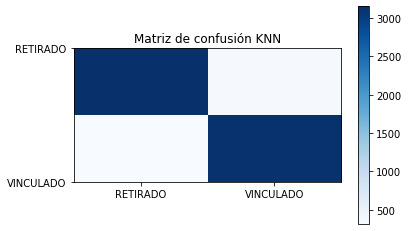

--------------------------------------------GNB-------------------------------------------------


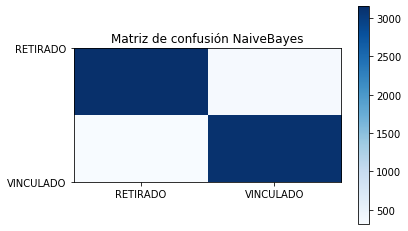

--------------------------------------------TREE-------------------------------------------------


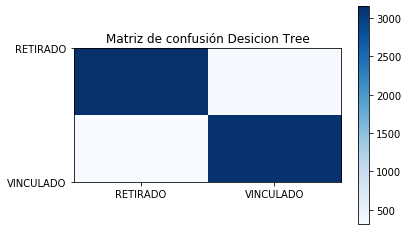

In [33]:
print("--------------------------------------------KNN-------------------------------------------------")
cmKNN= metrics.confusion_matrix(y_test, y_predict_knn)
cm=cmKNN
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión KNN")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, y_test.unique())
plt.yticks(tick_marks, y_test.unique())
plt.show()

print("--------------------------------------------GNB-------------------------------------------------")
cmGNB= metrics.confusion_matrix(y_test, y_predict_gnb)
cm=cmGNB
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión NaiveBayes")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, y_test.unique())
plt.yticks(tick_marks, y_test.unique())
plt.show()

print("--------------------------------------------TREE-------------------------------------------------")
cmTREE= metrics.confusion_matrix(y_test, y_predict_tree)
cm=cmTREE
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión Desicion Tree")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, y_test.unique())
plt.yticks(tick_marks, y_test.unique())
plt.show()




In [34]:
# Metricas KNN
print("--------------------------------------------KNN-------------------------------------------------")
print("Exactitud: ", metrics.accuracy_score(y_test, y_predict_knn))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_predict_knn))
print("Precisión     : ", metrics.precision_score(y_test, y_predict_knn, "LEAVE", average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_predict_knn, "LEAVE", average='macro'))


#Metricas GNB
print("--------------------------------------------GNB-------------------------------------------------")
print("Exactitud: ", metrics.accuracy_score(y_test, y_predict_gnb))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_predict_gnb))
print("Precisión     : ", metrics.precision_score(y_test, y_predict_gnb, "LEAVE", average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_predict_gnb, "LEAVE", average='macro'))


#Metricas Tree
print("--------------------------------------------Tree-------------------------------------------------")
print("Exactitud: ", metrics.accuracy_score(y_test, y_predict_tree))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_predict_tree))
print("Precisión     : ", metrics.precision_score(y_test, y_predict_tree, "LEAVE", average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_predict_tree, "LEAVE", average='macro'))





--------------------------------------------KNN-------------------------------------------------
Exactitud:  0.9042890040299367
Kappa    :  0.8085792452145433
Precisión     :  0.6028616913533201
Recall        :  0.602876588222296
Especificidad :  0.9002013229795801
F1-score      :  0.6028586368039088
--------------------------------------------GNB-------------------------------------------------
Exactitud:  0.9042890040299367
Kappa    :  0.8085792452145433
Precisión     :  0.6028616913533201
Recall        :  0.602876588222296
Especificidad :  0.9002013229795801
F1-score      :  0.6028586368039088
--------------------------------------------Tree-------------------------------------------------
Exactitud:  0.9042890040299367
Kappa    :  0.8085792452145433
Precisión     :  0.6028616913533201
Recall        :  0.602876588222296
Especificidad :  0.9002013229795801
F1-score      :  0.6028586368039088


A continuación presentaremos la justificación de las métricas escogidas:

1) Exactitud: puesto que nos interesa saber que tan capaces son nuestros modelos de clasificar correctamente, es decir, cada objeto en su respectiva clase a la que pertenece realmente.

2) kappa: A pesar de que la variable objetivo no está desbalanceada, la consideramos ya que nos permite sustraer la concordancia por suerte del valor del accuracy, y sería otro punto de apoyo para comparar los modelos. Ya que, entre más cercano a 1 mejor es el modelo.

3) precisión: Nos garantiza que los individuos que estamos identificando están bien clasificados, es decir, la certeza de nuestras predicciones.

4) recall: Nos permite identificar qué proporción de todos los que realmente pertencen a una categoría pude predecir como tal.

### Conclusión de la comparación

Despues de haber calibrado los modelos con los mejores parámetros de cada modelo, pudimos evidenciar que al momento de realizar los protocolos de evaluación con un holdout de 70% para entrenamiento y 30% para evaluación, además de un 5-fold cv encontramos que el desempeño de los 3 modelos es el mismo. Con este evento tan inesperado, llegamos a que ese es el mejor performance de cada modelo. Por lo tanto, al llegar al modelo óptimo de cada uno todos se comportan igual frente a un problema de clasificación. 

-------------------------------------------------------------

## Parte 2

In [12]:
data2=data.loc[data.ESTADO=="RETIRADO"]

In [13]:
data2.head()

ESTADO  INGRESOS         CASA  PRECIO_DISPOSITIVO  MESES  DURACION  \
2  RETIRADO    795993   95000000.0            452809.0     38      16.8   
3  RETIRADO   8115015   83000000.0           2617184.0     37      17.6   
4  RETIRADO   8187499  677000000.0            666069.0     19       0.0   
6  RETIRADO   7256758  712000000.0           3493707.0     20      14.8   
7  RETIRADO   3262245  684000000.0            985708.0     32       1.3   

   SOBRECARGO  SALDO_RESTANTE  SATISFACCION  
2  350.610224            13.9      8.359438  
3  230.913888            45.7      8.964017  
4  131.541983            67.2      8.808206  
6  217.322554            69.5      8.285137  
7  275.595131            19.0      8.040629

Dado que vamos realizar segmentación, lo cual significa que no es supervisado entonces eliminamos la columna Estado

In [14]:
data2= data2.drop(['ESTADO'],axis=1)

In [15]:
data2.head()

INGRESOS         CASA  PRECIO_DISPOSITIVO  MESES  DURACION  SOBRECARGO  \
2    795993   95000000.0            452809.0     38      16.8  350.610224   
3   8115015   83000000.0           2617184.0     37      17.6  230.913888   
4   8187499  677000000.0            666069.0     19       0.0  131.541983   
6   7256758  712000000.0           3493707.0     20      14.8  217.322554   
7   3262245  684000000.0            985708.0     32       1.3  275.595131   

   SALDO_RESTANTE  SATISFACCION  
2            13.9      8.359438  
3            45.7      8.964017  
4            67.2      8.808206  
6            69.5      8.285137  
7            19.0      8.040629

Estadarizamos este dataset

In [16]:
dataStd = pd.DataFrame(preprocessing.scale(data2))
dataStd.columns=data2.columns

In [17]:
dataStd.head()

INGRESOS      CASA  PRECIO_DISPOSITIVO     MESES  DURACION  SOBRECARGO  \
0 -1.468589 -1.288756           -1.154830  0.970830  1.022788    2.155673   
1  1.204152 -1.313675            1.751176  0.900645  1.136605    0.614047   
2  1.230622 -0.080224           -0.868495 -0.362682 -1.367358   -0.665810   
3  0.890736 -0.007546            2.928042 -0.292497  0.738247    0.438998   
4 -0.567969 -0.065688           -0.439331  0.549721 -1.182406    1.189518   

   SALDO_RESTANTE  SATISFACCION  
0       -0.963691      0.378232  
1        0.085300      0.733937  
2        0.794522      0.642266  
3        0.870393      0.334518  
4       -0.795456      0.190662

### A continuación vamos a obtener los componentes principales

In [53]:
pca = PCA()
pca.fit(dataStd)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
pca.components_

array([[ 6.48308470e-01,  4.19025136e-01, -1.64632260e-02,
        -1.36863842e-02, -8.64779733e-02,  3.64005984e-02,
         6.26669981e-01,  4.62276846e-02],
       [ 4.10794460e-02,  1.21082945e-02, -2.43906485e-02,
        -2.80567228e-02, -1.76930060e-02, -7.05910273e-01,
         3.87010612e-02, -7.04743682e-01],
       [-2.93427599e-02,  3.74944512e-03,  5.38580408e-01,
         2.21675220e-01,  7.96018567e-01, -1.54740782e-02,
         1.59417957e-01, -2.48413678e-02],
       [ 7.91517355e-03, -2.98567397e-03, -3.40299679e-01,
         9.39554378e-01, -3.22659953e-02, -8.93771645e-03,
         2.58379174e-03, -1.53127781e-02],
       [ 1.77041562e-02,  7.21576283e-02,  7.68041560e-01,
         2.58639805e-01, -5.68669277e-01, -3.45487800e-03,
        -1.17291981e-01, -2.33101141e-02],
       [-2.63916265e-01,  9.03677971e-01, -5.66633647e-02,
        -1.16823031e-02,  9.10300896e-02, -3.36256190e-03,
        -3.19181420e-01, -1.38763928e-02],
       [-3.24674236e-03,  4.604816

In [55]:
data2.columns

Index(['INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION',
       'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION'],
      dtype='object')

In [56]:
pca.explained_variance_

array([2.08515691, 1.68244285, 1.03358954, 0.998698  , 0.9841426 ,
       0.76932641, 0.31718447, 0.13014514])

In [57]:
var_exp=pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
var_exp

array([0.26062227, 0.21028733, 0.12918762, 0.12482655, 0.12300728,
       0.09615756, 0.03964466, 0.01626675])

In [58]:
dataPca = pca.transform(dataStd)

Se analizara de manera grafica la varianza explicada en cada componente principal

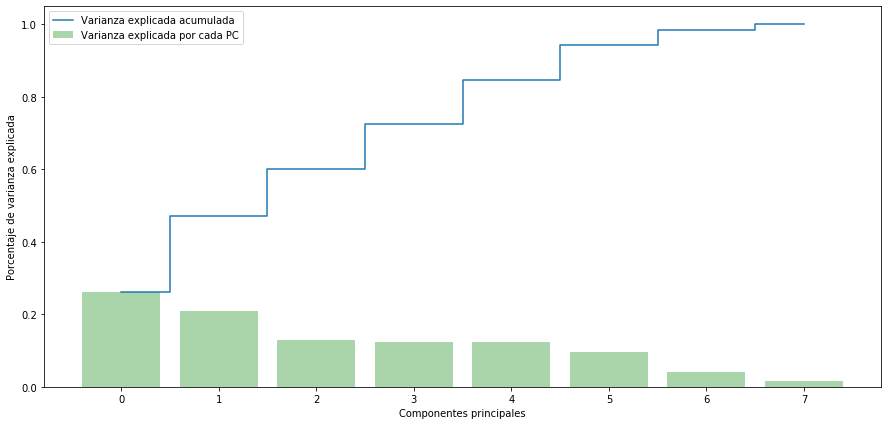

In [59]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [60]:
print("Con los 3 primeros componentes: ",np.sum(pca.explained_variance_ratio_[0:3]))
print("Con los 4 primeros componentes: ",np.sum(pca.explained_variance_ratio_[0:4]))
print("Con los 5 primeros componentes: ",np.sum(pca.explained_variance_ratio_[0:5]))
print("Con los 6 primeros componentes: ",np.sum(pca.explained_variance_ratio_[0:6]))


Con los 3 primeros componentes:  0.600097210620529
Con los 4 primeros componentes:  0.7249237577001743
Con los 5 primeros componentes:  0.8479310360222359
Con los 6 primeros componentes:  0.944088592428441


Se encontró que con los con los 3 primero componentes conservaremos el 60% de la información original. Y debido a que es más sencillo interpretar 3 dimensiones que 5, entonces escogeremos solamente los 3 primeros PCs

In [44]:
dataPca = dataPca[:,0:3]

In [23]:
dataPca[0:5]

array([[-2.08280679, -1.91866551,  0.24927686],
       [ 0.20048599, -1.0019304 ,  1.99316403],
       [ 1.40507298,  0.15325191, -1.551996  ],
       [ 1.04315886, -0.55173   ,  2.19729357],
       [-0.74015867, -1.01276047, -1.18950636]])

Se analizara de manera grafica la relacion de los componentes principales y las diferentes variables originales

In [168]:
def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:,index1]
    ys = data[:,index2]
    n=loadings.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,index1], loadings[i,index2],color='r',alpha=0.5)
        if labels is None:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(index1))
    plt.ylabel("PC{}".format(index2))
    plt.grid() 

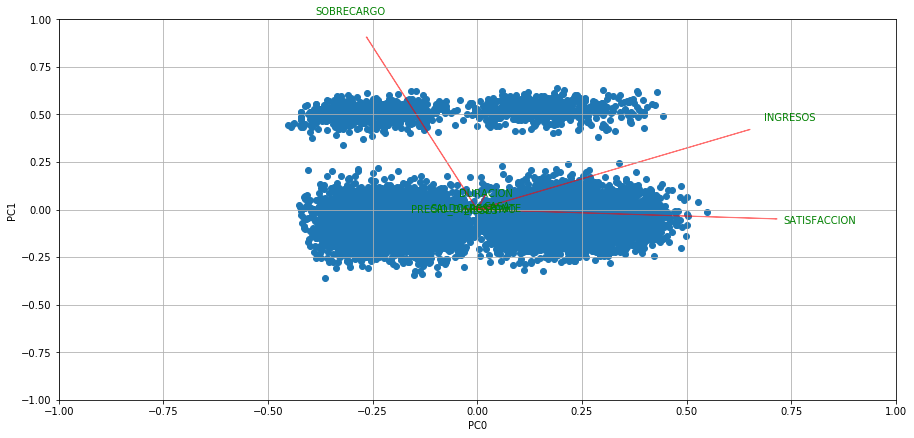

In [172]:
biplot(dataPca, pca.components_, 0, 1, ['INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION', 'SOBRECARGO','SALDO_RESTANTE','SATISFACCION'])

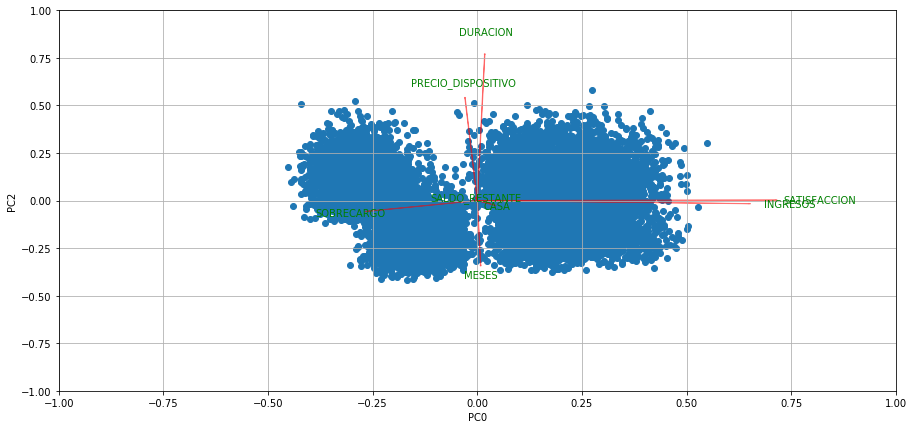

In [173]:
biplot(dataPca, pca.components_, 0, 2, ['INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION', 'SOBRECARGO','SALDO_RESTANTE','SATISFACCION'])

In [18]:
dataStd.columns[0:6]

Index(['INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION',
       'SOBRECARGO'],
      dtype='object')

In [180]:
pca.components_

array([[ 6.48308470e-01,  4.19025136e-01, -1.64632260e-02,
        -1.36863842e-02, -8.64779733e-02,  3.64005984e-02,
         6.26669981e-01,  4.62276846e-02],
       [ 4.10794460e-02,  1.21082945e-02, -2.43906485e-02,
        -2.80567228e-02, -1.76930060e-02, -7.05910273e-01,
         3.87010612e-02, -7.04743682e-01],
       [-2.93427599e-02,  3.74944512e-03,  5.38580408e-01,
         2.21675220e-01,  7.96018567e-01, -1.54740782e-02,
         1.59417957e-01, -2.48413678e-02],
       [ 7.91517355e-03, -2.98567397e-03, -3.40299679e-01,
         9.39554378e-01, -3.22659953e-02, -8.93771645e-03,
         2.58379174e-03, -1.53127781e-02],
       [ 1.77041562e-02,  7.21576283e-02,  7.68041560e-01,
         2.58639805e-01, -5.68669277e-01, -3.45487800e-03,
        -1.17291981e-01, -2.33101141e-02],
       [-2.63916265e-01,  9.03677971e-01, -5.66633647e-02,
        -1.16823031e-02,  9.10300896e-02, -3.36256190e-03,
        -3.19181420e-01, -1.38763928e-02],
       [-3.24674236e-03,  4.604816

De acuedo a esta información podemos decir que:

- El componente PC1 representa de manera positiva los retiros por SATISFACCION e INGRESOS, y en el sentido negativo contempla los retiros por SOBRECARGO
- El componente PC2 representa de manera positiva los retiros por Sobrecargo, las otras no tienen mayor incidencia
- El componente PC3 representa sobre todo los retiros de manera positiva por DURACION y PRECIO_DISPOSITIVO y de manera negativa MESES 

### Comparacion entre los cluster obtenidos usanso K-means y Clustering jerarquico

In [45]:
dataPca = pd.DataFrame(dataPca)
dataPca.columns=['PC1', 'PC2', 'PC3']

## Hallamos el k con el método del codo

In [47]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dataPca)
    WSSs.append(km.inertia_)
WSSs

[55996.27091742283,
 35426.250723586876,
 21092.879347601513,
 16250.017443911705,
 12667.015211761849,
 10634.355919948,
 9752.967428488362,
 9046.639529526157,
 8349.952297759086,
 7820.149791668449,
 7365.334752296337,
 6951.981554911685,
 6588.538279922989,
 6225.601042265544]

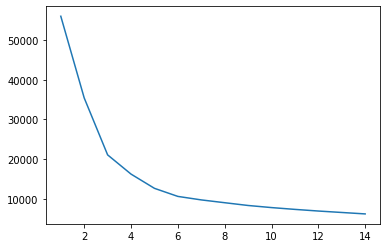

In [48]:
plt.plot(range(1, 15), WSSs)

En la gráfica podemos ver que el codo se encuentra en k=3

In [25]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataPca)
clusters = kmeans.labels_

In [26]:
dataPca['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({1: 5360, 0: 5151, 2: 1153})


In [27]:
var_num = ['INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION', 'SOBRECARGO','SALDO_RESTANTE','SATISFACCION']

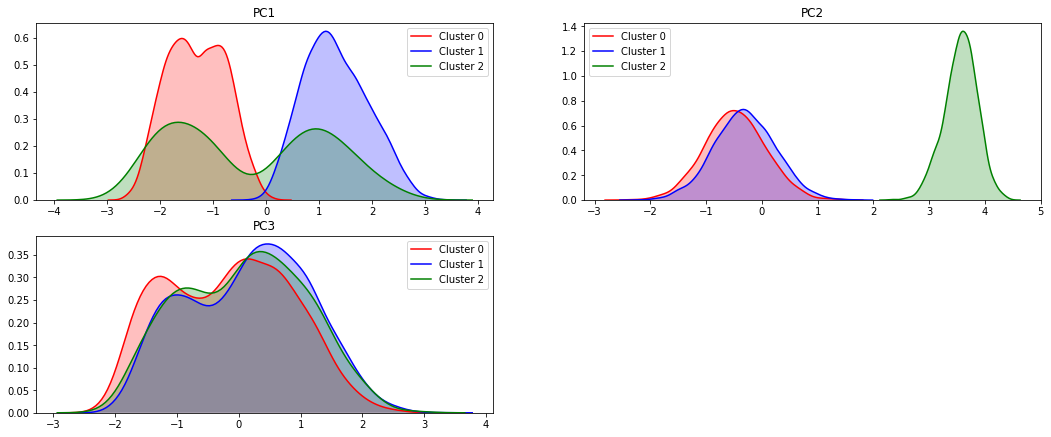

In [28]:
fig = plt.figure(figsize=(18,15))
i=1
for var in dataPca.columns[0:3]:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataPca.loc[dataPca.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==1][var], shade=True, color='b', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==2][var], shade=True, color='g', ax=ax);
   
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

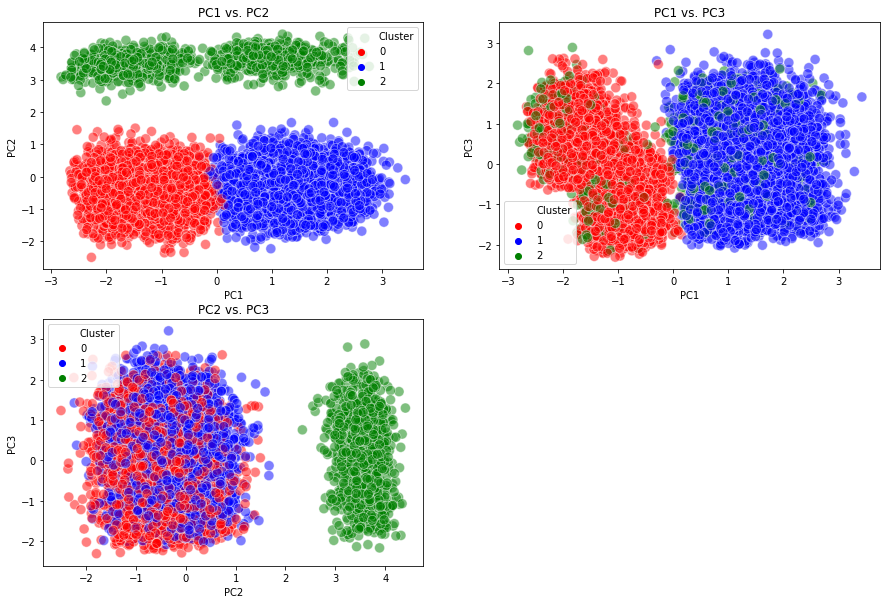

In [29]:
fig = plt.figure(figsize=(15,10))
colorPalette = ["r", "b", "g"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC2")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC3")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC2 vs. PC3")
plt.show()

In [30]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init=10)
kmeans.fit(dataPca)
clusters = kmeans.labels_


In [31]:
#***************+++++++++++++++
dataKm = pca.transform(dataStd)
dataKm = dataKm[:,0:6]

dataKm = pd.DataFrame(dataKm)
dataKm.columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6']
#dataJer.columns=['PC1', 'PC2', 'PC3']

dataKm['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({1: 3081, 5: 2743, 0: 2408, 4: 2279, 2: 592, 3: 561})


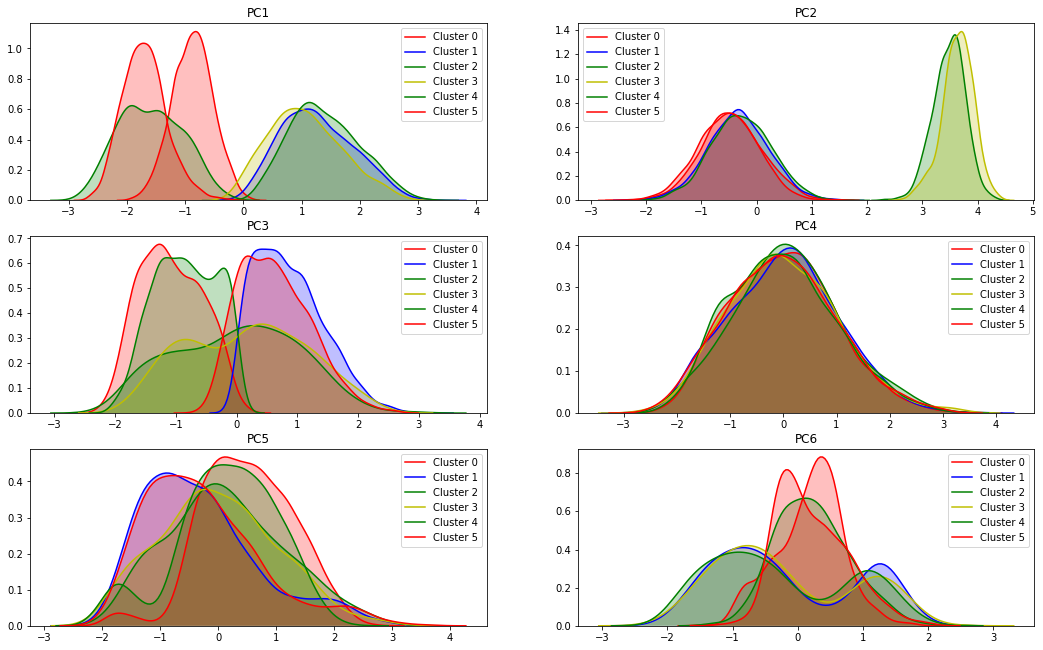

In [32]:
fig = plt.figure(figsize=(18,15))
i=1
for var in dataKm.columns[0:6]:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataKm.loc[dataKm.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataKm.loc[dataKm.Cluster==1][var], shade=True, color='b', ax=ax);
    sns.kdeplot(dataKm.loc[dataKm.Cluster==2][var], shade=True, color='g', ax=ax);
    sns.kdeplot(dataKm.loc[dataKm.Cluster==3][var], shade=True, color='y', ax=ax);
    sns.kdeplot(dataKm.loc[dataKm.Cluster==4][var], shade=True, color='G', ax=ax);
    sns.kdeplot(dataKm.loc[dataKm.Cluster==5][var], shade=True, color='R', ax=ax);
   
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5'])
    #plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2])
    
    i+=1

### Clustering jerarquico

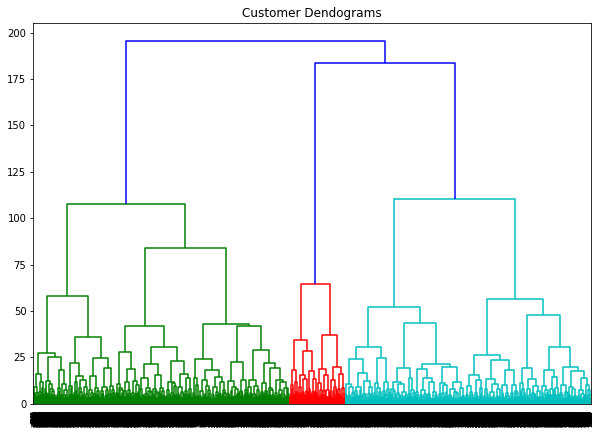

In [195]:
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(dataStd, method='ward')) 

In [72]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(dataStd)  

clusters = cluster.labels_


In [34]:
dataJer = pca.transform(dataStd)
dataJer = dataJer[:,0:3]

dataJer = pd.DataFrame(dataJer)
#dataJer.columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6']
dataJer.columns=['PC1', 'PC2', 'PC3']

dataJer['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({1: 5372, 0: 5139, 2: 1153})


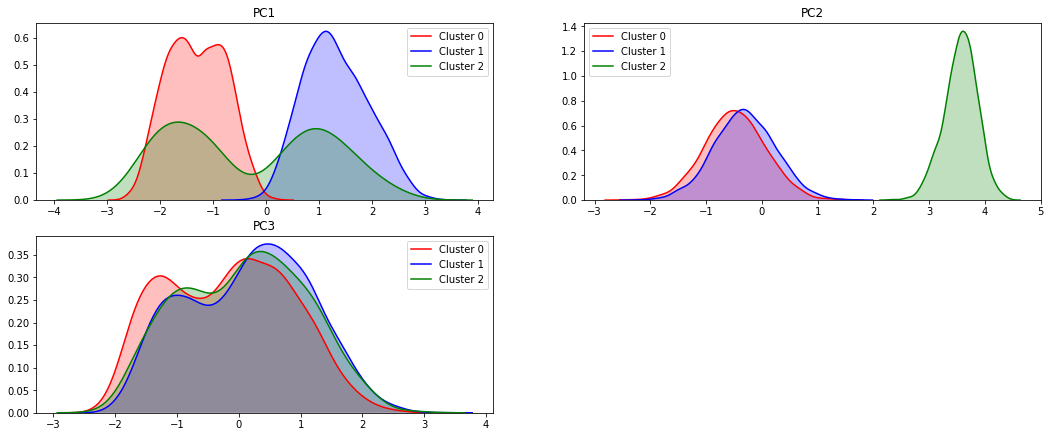

In [35]:
fig = plt.figure(figsize=(18,15))
i=1
for var in dataJer.columns[0:3]:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataJer.loc[dataJer.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataJer.loc[dataJer.Cluster==1][var], shade=True, color='b', ax=ax);
    sns.kdeplot(dataJer.loc[dataJer.Cluster==2][var], shade=True, color='g', ax=ax);
   
   
    plt.title(var)
   
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    
    i+=1

In [36]:
#en este punto el clusters es el de jerarquico
dataPca['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({1: 5372, 0: 5139, 2: 1153})


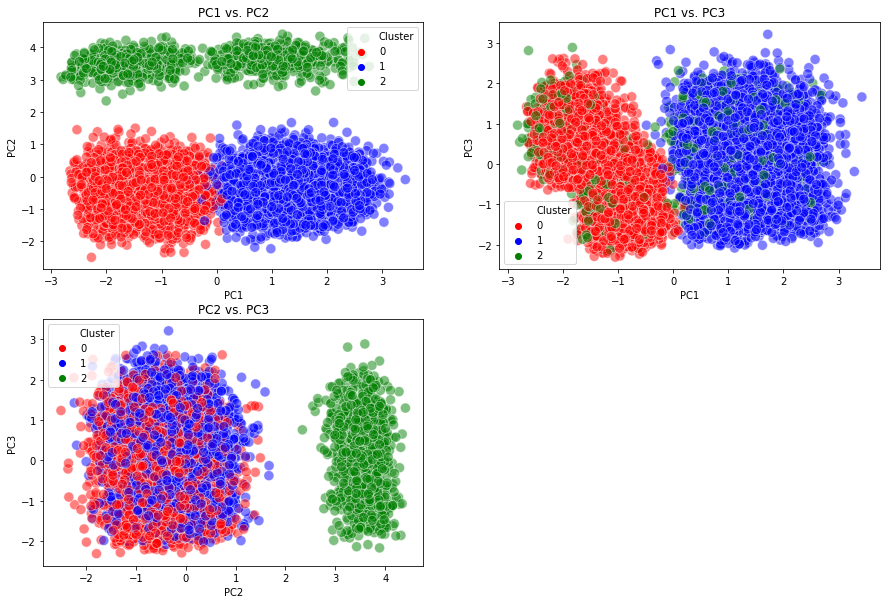

In [37]:
fig = plt.figure(figsize=(15,10))
colorPalette = ["r", "b", "g"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC2")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC3")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC2 vs. PC3")
plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(dataStd)  

clusters = cluster.labels_


In [39]:
dataJer = pca.transform(dataStd)
dataJer = dataJer[:,0:6]

dataJer = pd.DataFrame(dataJer)
dataJer.columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6']
#dataJer.columns=['PC1', 'PC2', 'PC3']

dataJer['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({4: 2639, 3: 2500, 2: 2059, 1: 1736, 5: 1577, 0: 1153})


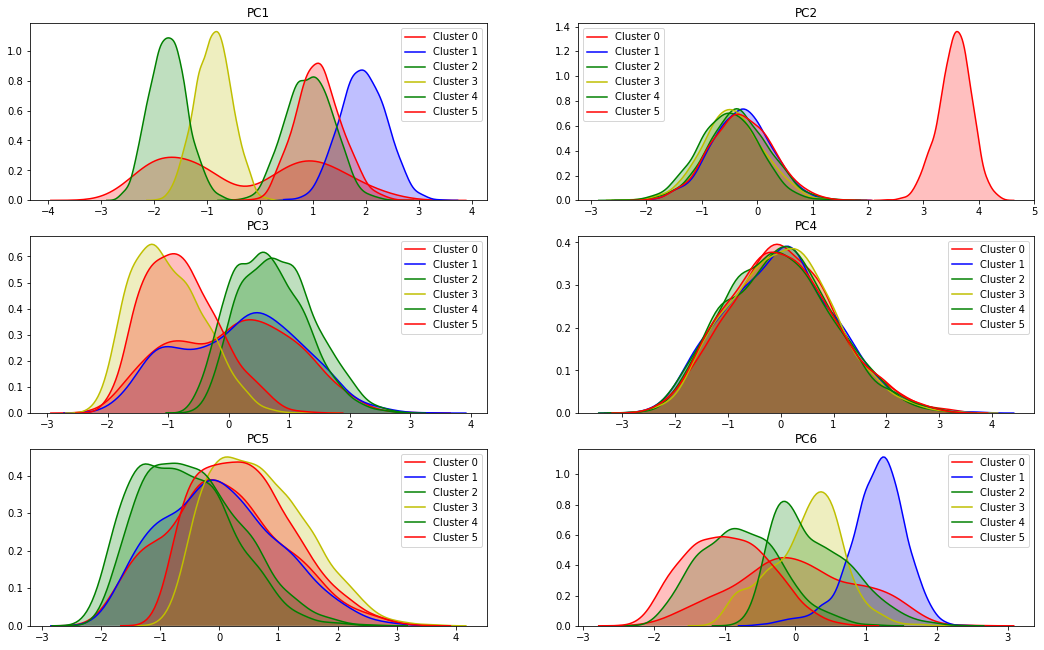

In [40]:
fig = plt.figure(figsize=(18,15))
i=1
for var in dataJer.columns[0:6]:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataJer.loc[dataJer.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataJer.loc[dataJer.Cluster==1][var], shade=True, color='b', ax=ax);
    sns.kdeplot(dataJer.loc[dataJer.Cluster==2][var], shade=True, color='g', ax=ax);
    sns.kdeplot(dataJer.loc[dataJer.Cluster==3][var], shade=True, color='y', ax=ax);
    sns.kdeplot(dataJer.loc[dataJer.Cluster==4][var], shade=True, color='G', ax=ax);
    sns.kdeplot(dataJer.loc[dataJer.Cluster==5][var], shade=True, color='R', ax=ax);
   
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5'])
    #plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2])
    
    i+=1

A partir de lo analizado anteriormente tomamos la decisión de elegir el cluster jerárquico con 3 cluster, porque así el PC1 sirve para separar bien los puntos de los diferentes clusters de manera más clara. De manera que con el PC1 podemos separar los cluster rojo y morado y con el PC2 podemos separar de manera clara el cluster verde. 

En el plot PC1 vs PC2 de clustering jerárquico con k=3, podemos discernir bien cada cluster. un cluster se encuentra en el lado positivo de PC1 y negativo de PC2, donde debido a esto podría ser etiquetado como aquellos clientes que tiene una baja satisfacción y 

In [61]:
dataStd.mean(axis=0)

INGRESOS              5.299830e-17
CASA                  4.762994e-17
PRECIO_DISPOSITIVO   -3.655055e-17
MESES                -8.185801e-18
DURACION             -7.934516e-17
SOBRECARGO           -2.017895e-18
SALDO_RESTANTE        5.694843e-17
SATISFACCION          1.969351e-17
dtype: float64

In [62]:
dataStd.std(axis=0)

INGRESOS              1.000043
CASA                  1.000043
PRECIO_DISPOSITIVO    1.000043
MESES                 1.000043
DURACION              1.000043
SOBRECARGO            1.000043
SALDO_RESTANTE        1.000043
SATISFACCION          1.000043
dtype: float64

In [19]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(dataStd)  

clusters = cluster.labels_

In [20]:
dataStd.loc[:,'Cluster'] = clusters

In [21]:
dataStd[0:5]

INGRESOS      CASA  PRECIO_DISPOSITIVO     MESES  DURACION  SOBRECARGO  \
0 -1.468589 -1.288756           -1.154830  0.970830  1.022788    2.155673   
1  1.204152 -1.313675            1.751176  0.900645  1.136605    0.614047   
2  1.230622 -0.080224           -0.868495 -0.362682 -1.367358   -0.665810   
3  0.890736 -0.007546            2.928042 -0.292497  0.738247    0.438998   
4 -0.567969 -0.065688           -0.439331  0.549721 -1.182406    1.189518   

   SALDO_RESTANTE  SATISFACCION  Cluster  
0       -0.963691      0.378232        0  
1        0.085300      0.733937        1  
2        0.794522      0.642266        1  
3        0.870393      0.334518        1  
4       -0.795456      0.190662        0

In [22]:
var_num = ['INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION', 'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION']

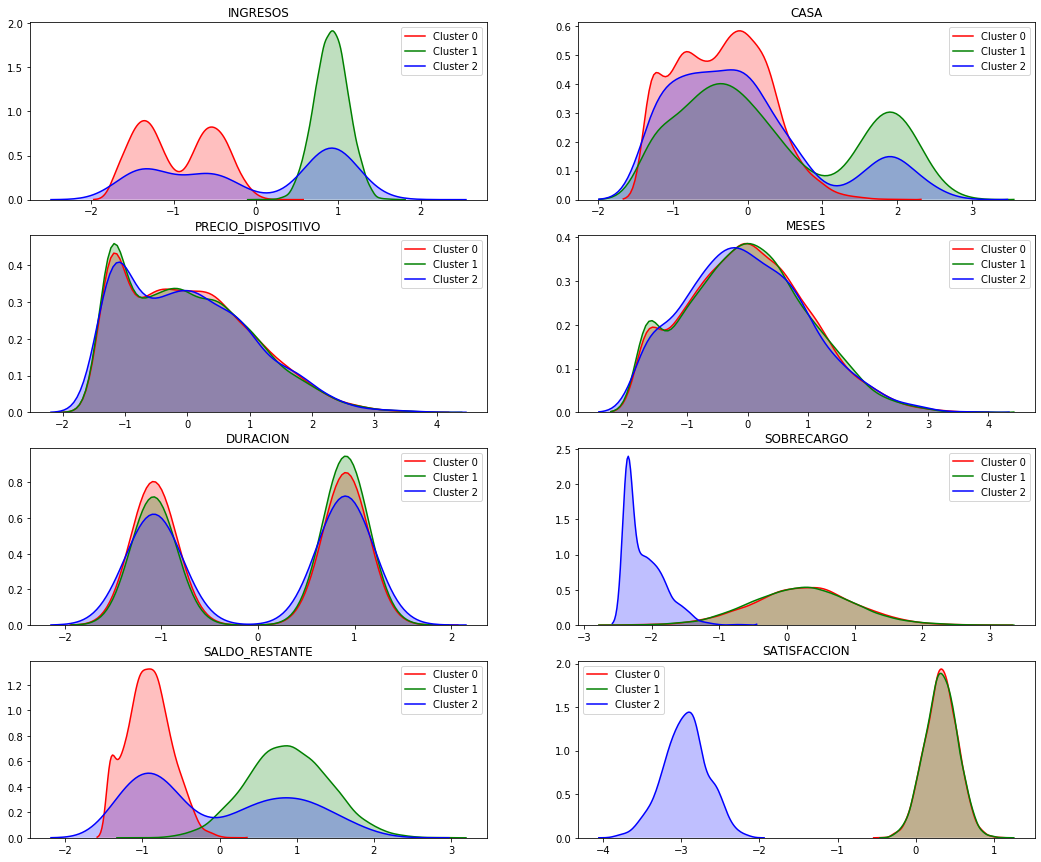

In [23]:
fig = plt.figure(figsize=(18,15))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='g', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==2][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

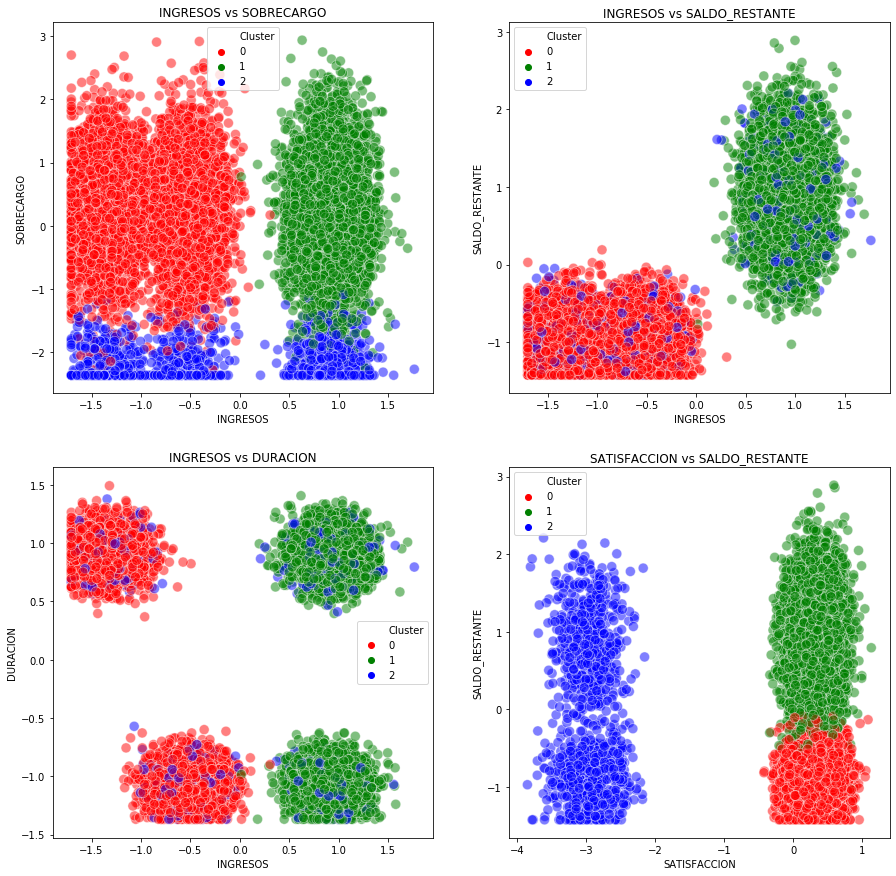

In [28]:
fig = plt.figure(figsize=(15,15))
colorPalette = ["r", "g", "b"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="INGRESOS", y="SOBRECARGO", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("INGRESOS vs SOBRECARGO")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="INGRESOS", y="SALDO_RESTANTE", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("INGRESOS vs SALDO_RESTANTE")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="INGRESOS", y="DURACION", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("INGRESOS vs DURACION")
ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(x="SATISFACCION", y="SALDO_RESTANTE", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("SATISFACCION vs SALDO_RESTANTE")



plt.show()

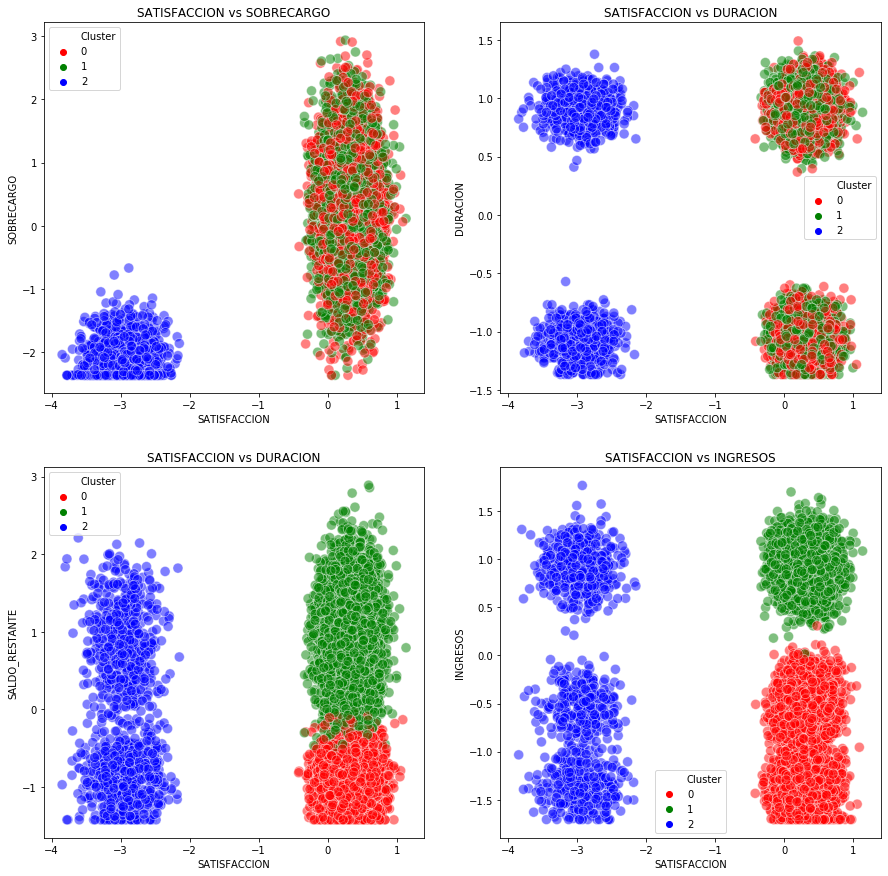

In [30]:
fig = plt.figure(figsize=(15,15))
colorPalette = ["r", "g", "b"]
ax = fig.add_subplot(2, 2, 1)

sns.scatterplot(x="SATISFACCION", y="SOBRECARGO", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("SATISFACCION vs SOBRECARGO")

ax = fig.add_subplot(2, 2, 2)

sns.scatterplot(x="SATISFACCION", y="DURACION", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("SATISFACCION vs DURACION")

ax = fig.add_subplot(2, 2, 3)

sns.scatterplot(x="SATISFACCION", y="SALDO_RESTANTE", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("SATISFACCION vs DURACION")


ax = fig.add_subplot(2, 2, 4)

sns.scatterplot(x="SATISFACCION", y="INGRESOS", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("SATISFACCION vs INGRESOS")


plt.show()

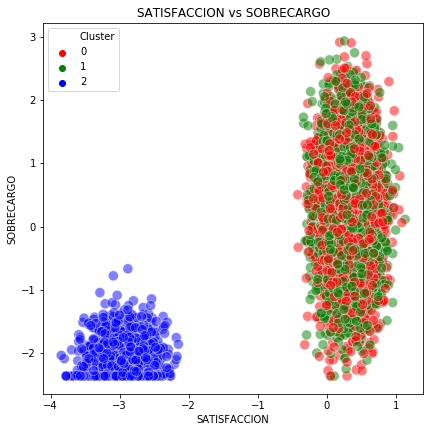

In [33]:
fig = plt.figure(figsize=(15,15))
colorPalette = ["r", "g", "b"]
ax = fig.add_subplot(2, 2, 1)

sns.scatterplot(x="SATISFACCION", y="SOBRECARGO", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("SATISFACCION vs SOBRECARGO")

plt.show()

####  <span style="color: blue"> Del cluster Azul podemos decir que: </span>

- su principal caracteristica es que son aquellos cliente que poseen un sobrecargo menor que los otros 2 conjuntos.
- otra característica distintiva es que poseen una satisfacción baja
- En las demás características el cluster se encuentra dividido.

Estrategia de mercado para el conjunto de clientes pertenecientes al cluster azul:

- como el sobrecargo es menor comparado con los otros clusters, este cluster representa los usuario que su plan no alcanza a abarcar sus necesidades. Por lo tanto se les debe ofrecer planes que les ofrezcan una mayor cantidad de minutos a un precio considerable con respecto a la competencia. 

####  <span style="color: red"> Del cluster rojo podemos decir que: </span>

- la mayoría sus individuos poseen ingresos menores comparado con los otros clusters
- la mayoría individuos poseen una satisfacción alta
- el saldo restante de sus individuos es menor

Estrategia de mercado para el conjunto de clientes pertenecientes al cluster azul:

- Este cluster se puede etiquetar como aquellos usuarios que utilizan demasiados minutos fijandonos en su saldo restante, por otro lado, teniendo en cuenta sus ingresos, un plan ecónomico se ajustaría mucho a sus necesidades. Por esta razón, se les podrían ofrecer planes ecónomicos que la compañía pueda ofrecer con llamadas ilimitadas a cierto contacto preferido, por ejemplo. También podría ser planes de minutos ilimitados por un día o un plan que les ofrezca una gran cantidad de minutos a un precio bajo, también un plan de minutos ilimitados ó regalos de minutos sobre su recarga en caso de que sean prepago.

#### <span style="color: green"> Del cluster verde podemos decir que: </span>


- la mayoría de sus individuos poseen ingresos altos 
- la mayoría de sus individuos posee un saldo restante alto
- En el resto de variables el conjunto se encuentra dividido


Estrategia de mercado para el conjunto de clientes pertenecientes al cluster azul:

- Este cluster se puede etiquetar como los individuos con ingresos altos, que por lo general poseen un promedio de saldo restante alto, es decir, no utilizan todo el saldo de su plan. Para retener este tipo de usuario se podría establecer un plan en donde el usuario sólo pague por los minutos que consume, sin que tengan vencimiento. Por otro lado, también se debe de tener en cuenta que no utilizan todo el saldo de los planes que poseían, por ende se debe establecer un plan con menos minuto para que se acople a su consumo.
